# 图像处理实验5
陈乐昕 2020-11-17

## 实验环境


## 感知器算法
思路：
1. 随机生成20个点，一边标签为`1`，一边标签为`-1`
2. 随机生成初始化一条直线
3. 寻找分类错误的点的集合
4. 计算错误的点的`lose`，进行随机梯度算法`SGD`的更新
5. 重复第3步
6. 直到分类结束

In [74]:
# 环境
from math import *
import random
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [21]:
def view_fig():
    plt.plot(x,g,ls='--',c='#FF7256',label='g=k*x+t')
    plt.xlabel("x-axis")
    plt.ylabel("y-axis")
    plt.xlim(-15,15)
    plt.ylim(-15,15)
    plt.title("1")
    plt.axhline(y=0,ls="-",lw=0.5,c="black")#添加水平直线
    plt.axvline(x=0,ls="-",lw=0.5,c="black")#添加垂直直线
    plt.plot([0],[0],'ro')
    
    # 大于0的都是浅蓝色 小于0的都是浅绿色
    plt.scatter(X[:10,0],X[:10,1],c='#00BFFF',label='标签为1，且正确')
    plt.scatter(X[10:,0],X[10:,1],c='#00FA9A',label='标签为-1.且正确')

辅助线的参数： [-7, 2]


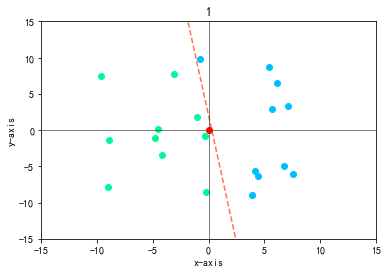

In [115]:
# 随机生成一条辅助直线 用来产生两边不一样的点
[k,t] = np.random.randint(-10,10,size=2)
x = np.linspace(-10, 10, 100)
print("辅助线的参数：",[k,t])
g = k * x + t

# 随机生成标签为1和-1的20个点作为数据集
X = []
Y = []
kk=1
while(kk==1):
    xi = list(np.random.randint(-100,100,size=2)/10)
    if xi[1]-k*xi[0]-t > 2:
        X.append(xi)
        Y.append(1)
    if len(X)==10:
        kk=0
while(kk==0):
    xi = list(np.random.randint(-100,100,size=2)/10)
    if xi[1]-k*xi[0]-t < -2:
        X.append(xi)
        Y.append(-1)
    if len(X)==20:
        kk=1
X = np.array(X)
Y = np.array(Y)
#print("数据集：")
#print("X: ",X)
#print("Y: ",Y)

view_fig()
plt.show()

预测线的参数： [1, 0]


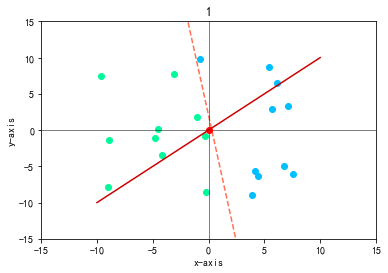

In [116]:
# 初始化一条用来预测分类的直线
[w,b] = [1, 0]
print("预测线的参数：",[w,b])
y = w * x + b

view_fig()
plt.plot(x,y,ls='-',c='#CD0000',label="y=w*x+b")
plt.show()

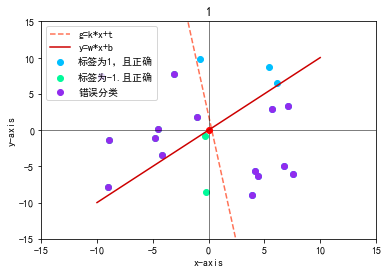

In [117]:
# 寻找分类错误的点的集合

def update_P():
    p = []
    py = []
    for i in range(len(X)):
        if Y[i]*(X[i,1]-w*X[i,0]-b) < 0:
            p.append(X[i])
            py.append(Y[i])
    p = np.array(p)
    py = np.array(py)
    return [p, py]

[P,P_Y] = update_P()
# print("错误点的集合：\n", P, "\n", P_Y)

view_fig()
plt.plot(x,y,ls='-',c='#CD0000',label="y=w*x+b")
plt.scatter(P[:,0],P[:,1],c='#912CEE',label="错误分类")
# 显示标签
plt.legend()
plt.show()

选择： 13 [-4.2 -3.5]
更新后预测线的参数： [0.15999999999999992, 0.2]


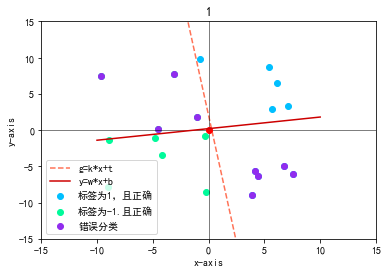

选择： 1 [ 4.2 -5.6]
更新后预测线的参数： [-0.6800000000000002, 0.0]


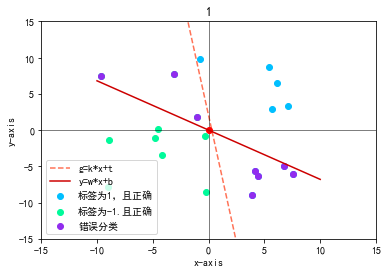

选择： 6 [-9.6  7.4]
更新后预测线的参数： [-2.6, 0.2]


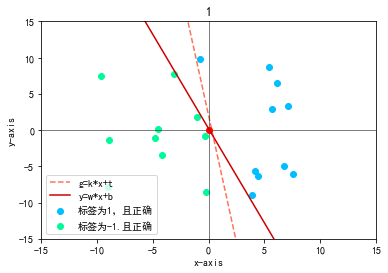

In [118]:
# 计算错误的点的`lose`，进行随机梯度算法`SGD`的更新

# 更新率
a = 0.2
def SGD(w,b,p,py):
    # 随机梯度下降算法
    n = np.random.randint(len(p))
    print("选择：", n, P[n])
    w = w - a*py[n]*p[n,0]
    b = b - a*py[n]
    return [w,b]


while(len(P)!=0):
    [w, b] = SGD(w, b, P, P_Y)
    print("更新后预测线的参数：", [w,b])
    y = w * x + b
    [P,P_Y] = update_P()
    # print("错误点的集合：\n", P, "\n", P_Y)

    view_fig()
    plt.plot(x,y,ls='-',c='#CD0000',label="y=w*x+b")
    if len(P)!=0:
        plt.scatter(P[:,0],P[:,1],c='#912CEE',label="错误分类")
    # 显示标签
    plt.legend()
    plt.show()

## 总结
1. 过程并不复杂也不难，难的是如何将过程可视化